In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
from utils.classUtils.Feynman import Feynman

In [3]:
x_yy_4h_8j = Feynman('x').decays(
    Feynman('y').decays(
        Feynman('h').decays('j','j'),
        Feynman('h').decays('j','j')
    ),

    Feynman('y').decays(
        Feynman('h').decays('j','j'),
        Feynman('h').decays('j','j')
    ),
)

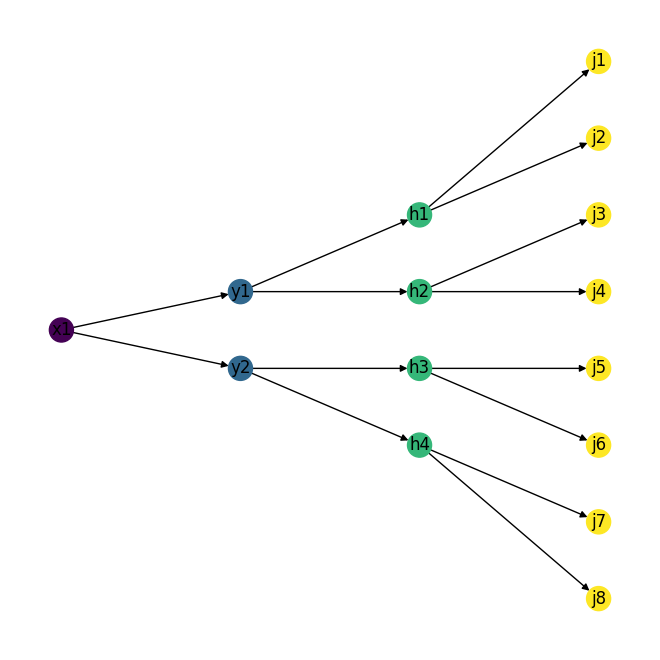

In [4]:
x_yy_4h_8j.draw_diagram()

In [5]:
class FeynFeatures:
    def __init__(self, **finalstate_features):
        self.__dict__.update(**finalstate_features)
    def __getitem__(self, key): return self.__dict__.get(key, None)
    def __setitem__(self, key, value): self.__dict__[key] = value

In [6]:
class ParticleEmbedding:
    def __init__(self, feynmans):
        self.feynmans = feynmans
        self.typeid = feynmans[0].typeid

    def __call__(self, features):
        x = features[self.typeid]

        print(f'embedding {self.typeid} particles')
        features[self.typeid] = x 
        return features

    def __repr__(self): return f'<Embedding {self.typeid}>'

In [7]:
nfinalstate_objs = dict(j=8)

In [21]:
x_yh_3h_6b = Feynman('x').decays(
    Feynman('hx').decays(Feynman('h').decays('j','j')),
    Feynman('y').decays(
        Feynman('h').decays('j','j'),
        Feynman('h').decays('j','j')
    ),
)

45

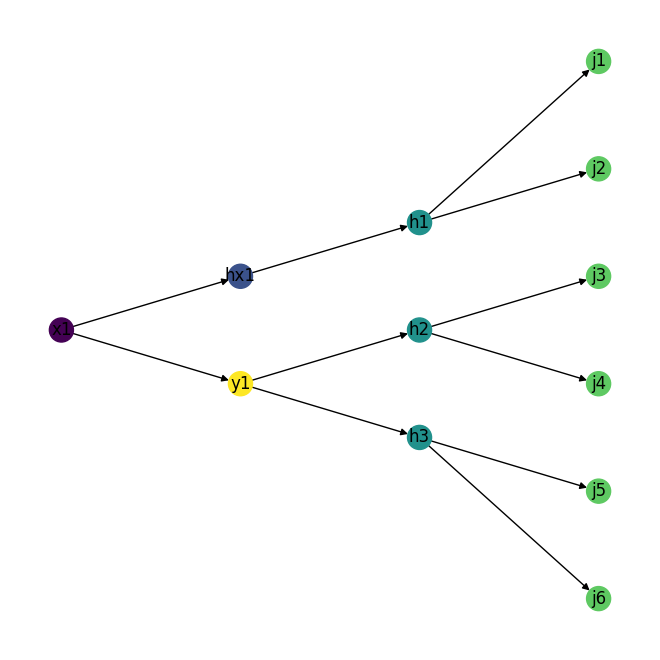

In [22]:
x_yh_3h_6b.draw_diagram()
len(x_yh_3h_6b.get_finalstate_permutations(j=6)['j'])

In [58]:
nfinalstates = dict(j=6)
internalstates = x_yh_3h_6b.get_internalstate_types()
internal_index = { typeid:states[0].get_product_permutations(**nfinalstates) for typeid, states in internalstates.items() }
features = FeynFeatures(j=np.random.rand(10,4,8))
def conv1d(features, n_out=10):
    nbatch, nft, nobjs = features.shape
    weights = np.random.rand(nft, n_out)
    features = features.transpose(0,2,1) @ weights
    return features.transpose(0,2,1)
    


for particle, products in internal_index.items():
    particle_features = np.concatenate([ features[key][:,:,assignment] for key, assignment in products.items() ], axis=-1)
    particle_features = particle_features.max(axis=-1)

    particle_features=  conv1d(particle_features, 32)

    features[particle] = particle_features


In [79]:
features.x.shape

(10, 32, 45)

In [81]:
x_tt_wb_2b_4j = Feynman('x').decays(
    Feynman('t').decays(
        Feynman('b').decays('j'),
        Feynman('w').decays('j','j'),
    ),

    Feynman('t').decays(
        Feynman('b').decays('j'),
        Feynman('w').decays('j','j'),
    ),
)

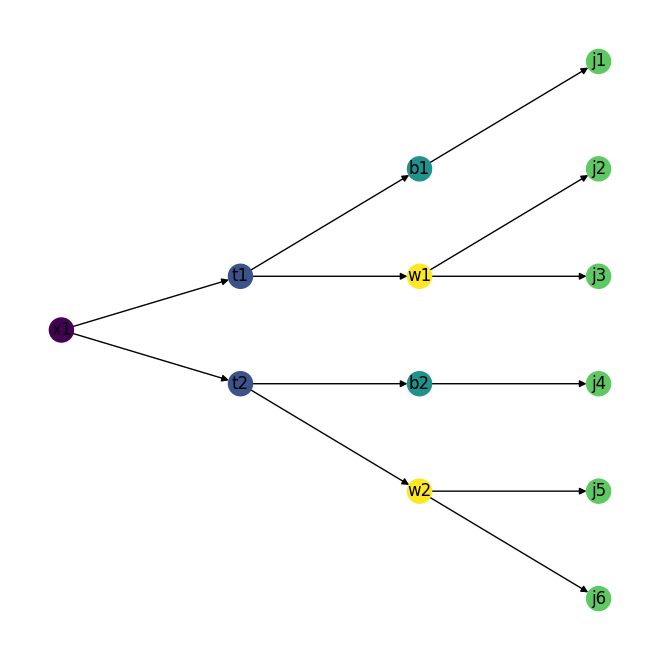

In [82]:
x_tt_wb_2b_4j.draw_diagram()

In [ ]:
nfinalstates = dict(j=6)
internalstates = x_tt_wb_2b_4j.get_internalstate_types()
internal_index = { typeid:states[0].get_product_permutations(**nfinalstates) for typeid, states in internalstates.items() }
features = FeynFeatures(j=np.random.rand(10,4,8))
def conv1d(features, n_out=10):
    nbatch, nft, nobjs = features.shape
    weights = np.random.rand(nft, n_out)
    features = features.transpose(0,2,1) @ weights
    return features.transpose(0,2,1)
    


for particle, products in internal_index.items():
    particle_features = np.concatenate([ features[key][:,:,assignment] for key, assignment in products.items() ], axis=-1)
    particle_features = particle_features.max(axis=-1)

    particle_features=  conv1d(particle_features, 32)

    features[particle] = particle_features
